In [1]:
import numpy as np
import matplotlib.pyplot as plt
from files_sorting import Txt_Reading
import pandas as pd
import os

%matplotlib inline

In [2]:
folder = "10nM"
f_MAX = [10, 15, 20, 25, 30, 35]
f_max = 35
reading = Txt_Reading(folder, f_max)

The break point λ_0 [0.08457288002555995] could be smaller/higher than expected
or the rupture force [3.8299] smaller/higher than expected


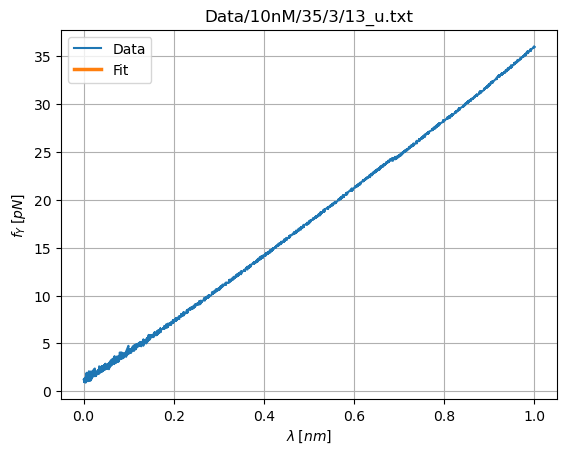

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,0,0,0,0,0.0,0,0,0,0,0,1


In [3]:
file = reading.readTxt(number=3, N=13, ty='u', graph=True)
reading.params_df

In [4]:
# plt.plot(reading.λ[:600], reading.force_Y[:600])
# plt.scatter(reading.λ_0, reading.f_rupture, marker="^", c="red")
# plt.scatter(reading.λ[(reading.index+1)[0]], reading.f_rupture_next, marker="v", c="orange", s=1000);

In [5]:
reading.f_rupture, reading.f_rupture_next

([0], [0])

The break point λ_0 [0.04719187477584262] could be smaller/higher than expected
or the rupture force [2.9141] smaller/higher than expected


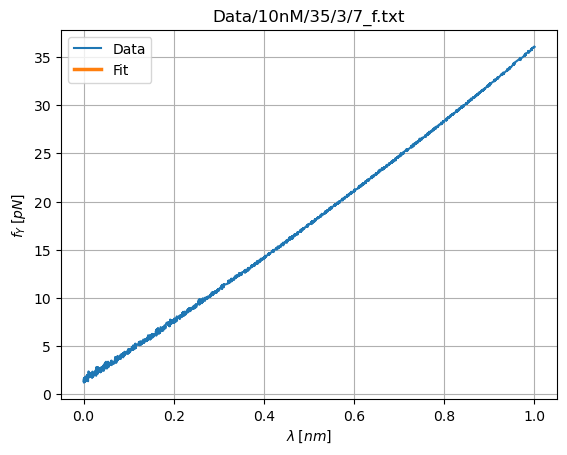

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,0,0,0,0,0.0,0,0,0,0,0,1


In [6]:
file = reading.readTxt(number=3, N=7, ty='f', graph=True)
reading.params_df

In [7]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

In [8]:
molecules, all_molecules_f, all_molecules_u = reading.sequential_analysis()

  0%|          | 0/3 [00:00<?, ?it/s]

Not saving file Data/10nM/35/3/31_f.txt
Not saving file Data/10nM/35/16/13_u.txt
Not saving file Data/10nM/35/16/29_u.txt
Not saving file Data/10nM/35/17/1_f.txt
Not saving file Data/10nM/35/17/4_f.txt
Not saving file Data/10nM/35/17/5_f.txt
Not saving file Data/10nM/35/17/4_u.txt
Not saving file Data/10nM/35/17/5_u.txt
Not saving file Data/10nM/35/17/33_u.txt
Saving results...


In [9]:
λ = reading.file[1:, -1]
force_Y = np.abs(reading.file[1:, 2])

The break point λ_0 [0.011701243912394823] could be smaller/higher than expected
or the rupture force [1.7294] smaller/higher than expected


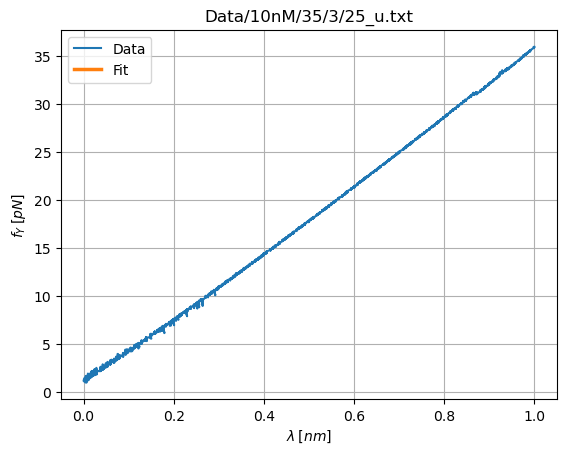

In [10]:
file = reading.readTxt(number=3, N=25, ty='u', graph=True)

In [11]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,0,0,0,0,0.0,0,0,0,0,0,1


In [12]:
reading.k_eff

0.05224848646711396

In [13]:
reading.res_fold.head()

,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0
0,3.0,4.9449,4.607472,13.362267,40.898714,6.11221
1,3.0,4.0124,3.672657,8.353455,28.066434,19.81463
2,3.0,0.0000,0.000000,0.000000,0.000000,27.04371
3,3.0,0.0000,0.000000,0.000000,0.000000,40.62663
4,3.0,0.0000,0.000000,0.000000,0.000000,53.94888


In [14]:
reading.res_unfold.head()

,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0
0,3.0,3.59185,3.090225,10.804032,38.370053,-6.19288
1,3.0,3.29730,3.076981,8.873774,32.992192,7.46693
2,3.0,3.97430,3.607575,10.893362,36.769296,20.92885
3,3.0,3.30235,3.042674,6.995935,25.988599,34.40130
4,3.0,0.00000,0.000000,0.000000,0.000000,47.22857


In [15]:
# f_max = f_MAX[4]
# colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
#             "#e3b505","#95190c","#610345","#107e7d","#044b7f"]
# markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x"]

# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_f[m])):
#         lab = f'Molecule {m}' if i == 0 else ''
#         f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
#         plt.scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
# plt.grid()
# plt.legend(loc='best')
# plt.title(f'f_MAX = {f_max} -- Fold')
# # plt.xscale('log')
# plt.xlabel('Time [s]')
# plt.ylabel('$f_{rupture} \\:[pN]$')
# plt.show()

In [16]:
# Create folder for images
images_path = f'imgs/{folder}/{f_max}'
isExist = os.path.exists(images_path)
if not isExist:
    os.makedirs(images_path)
    print("The images directory is created...")

The images directory is created...


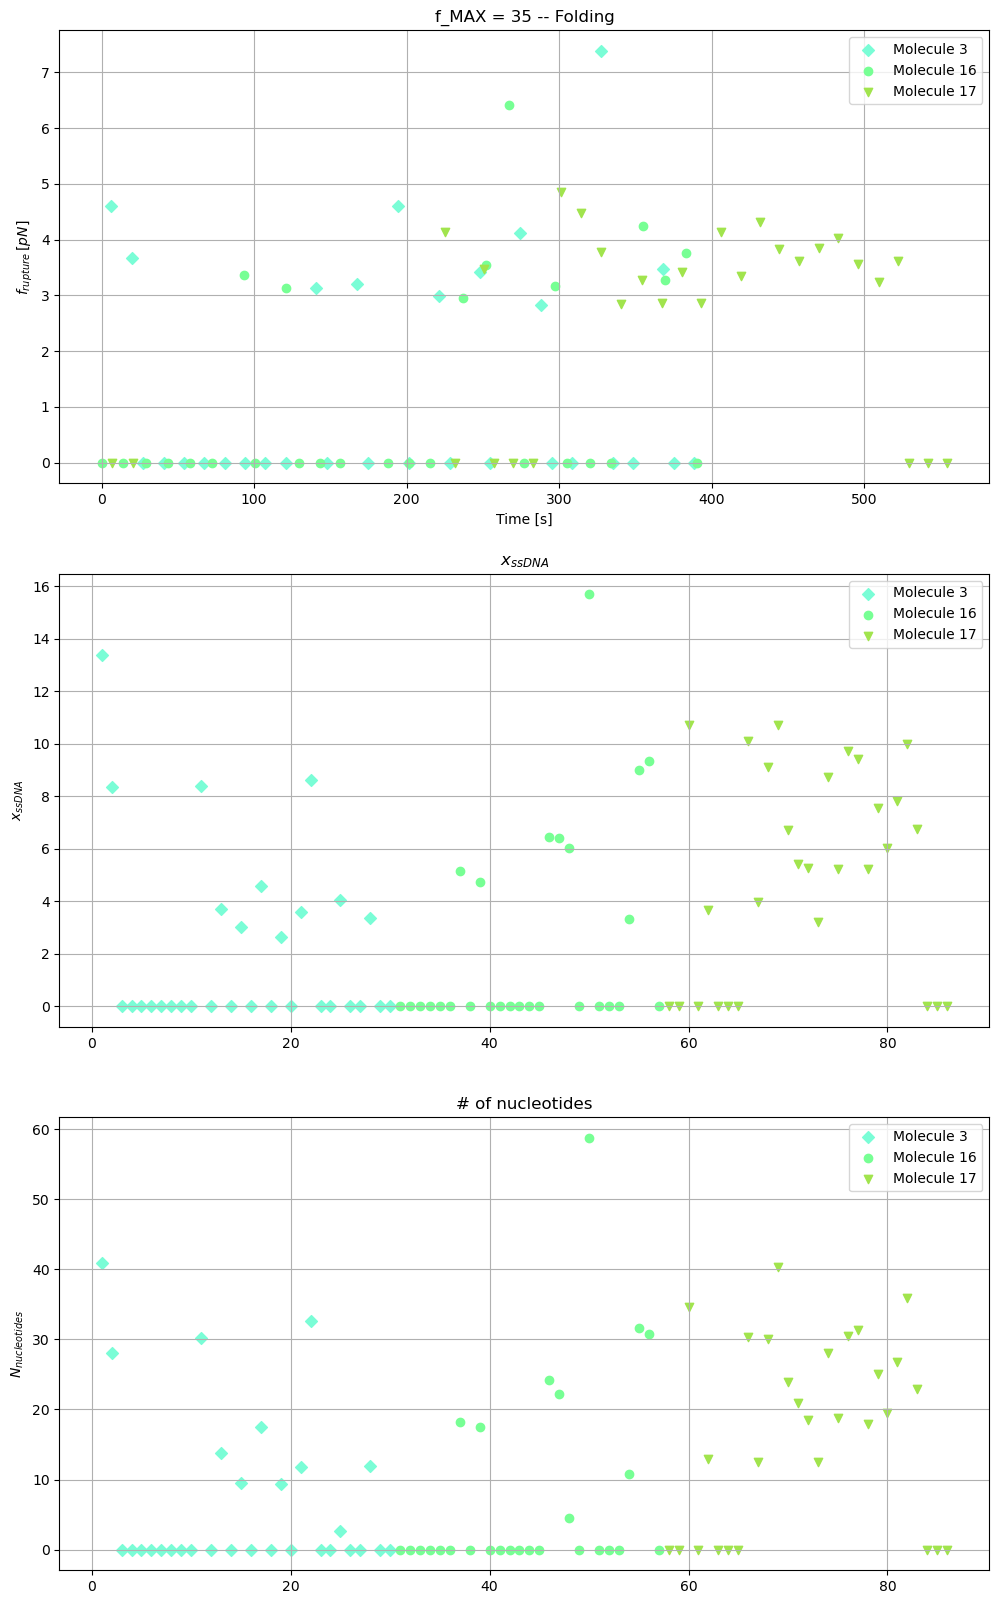

In [17]:
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_f[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Folding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
plt.show()

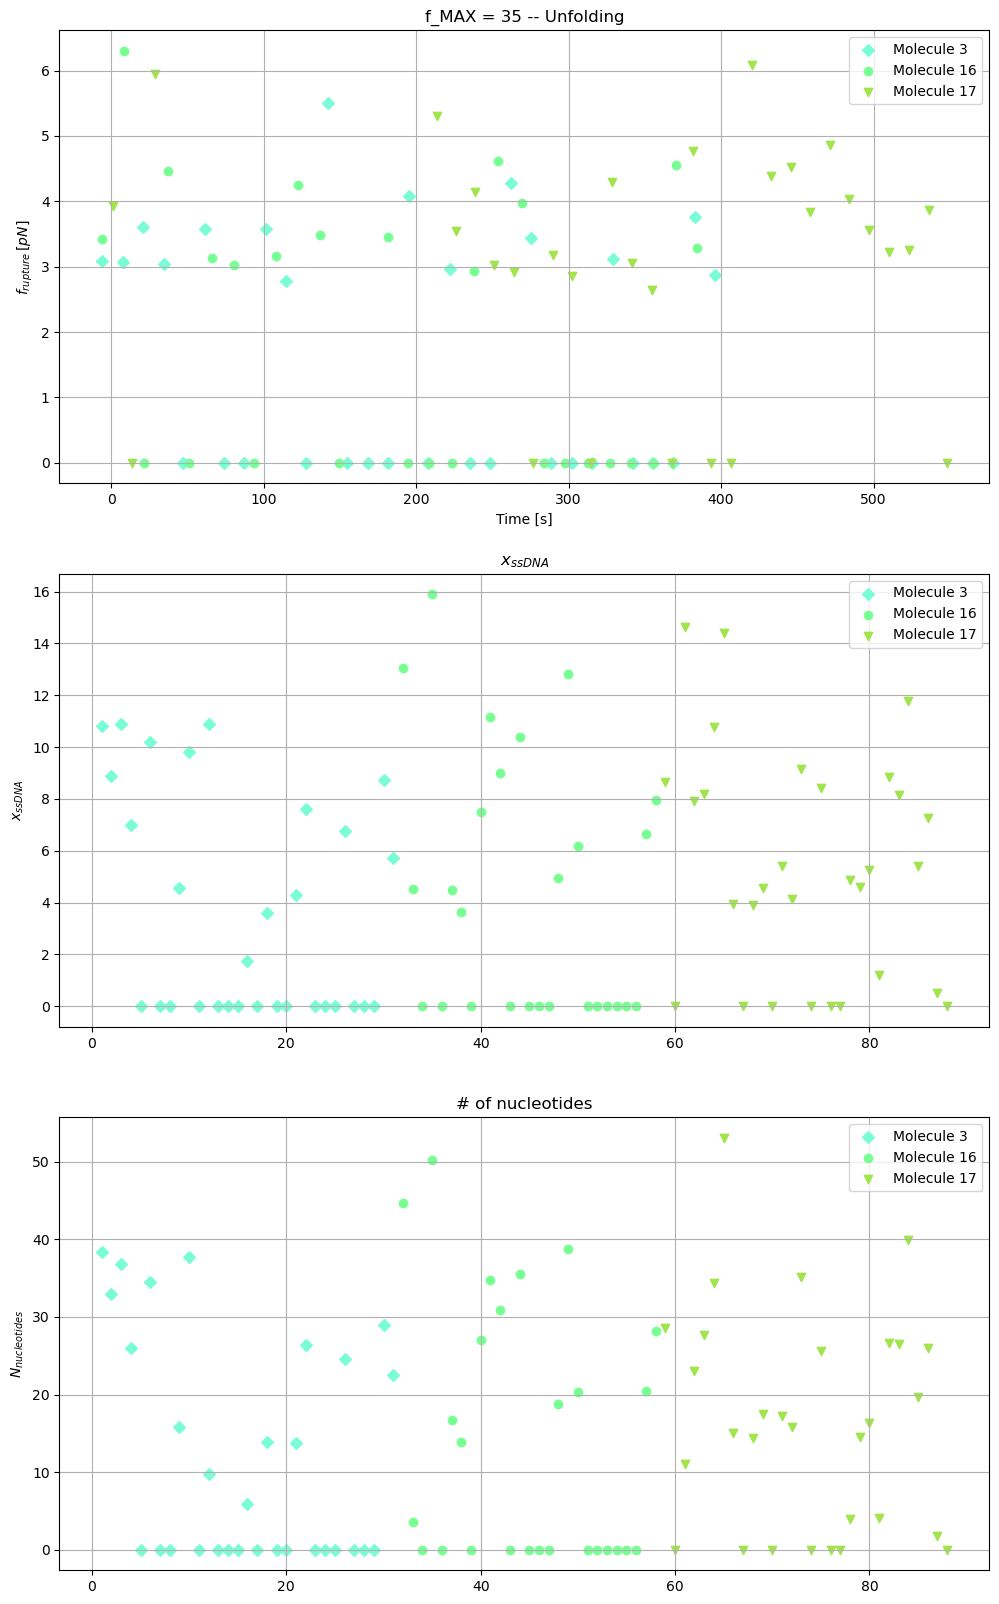

In [18]:
fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_u[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Plots per single molecule

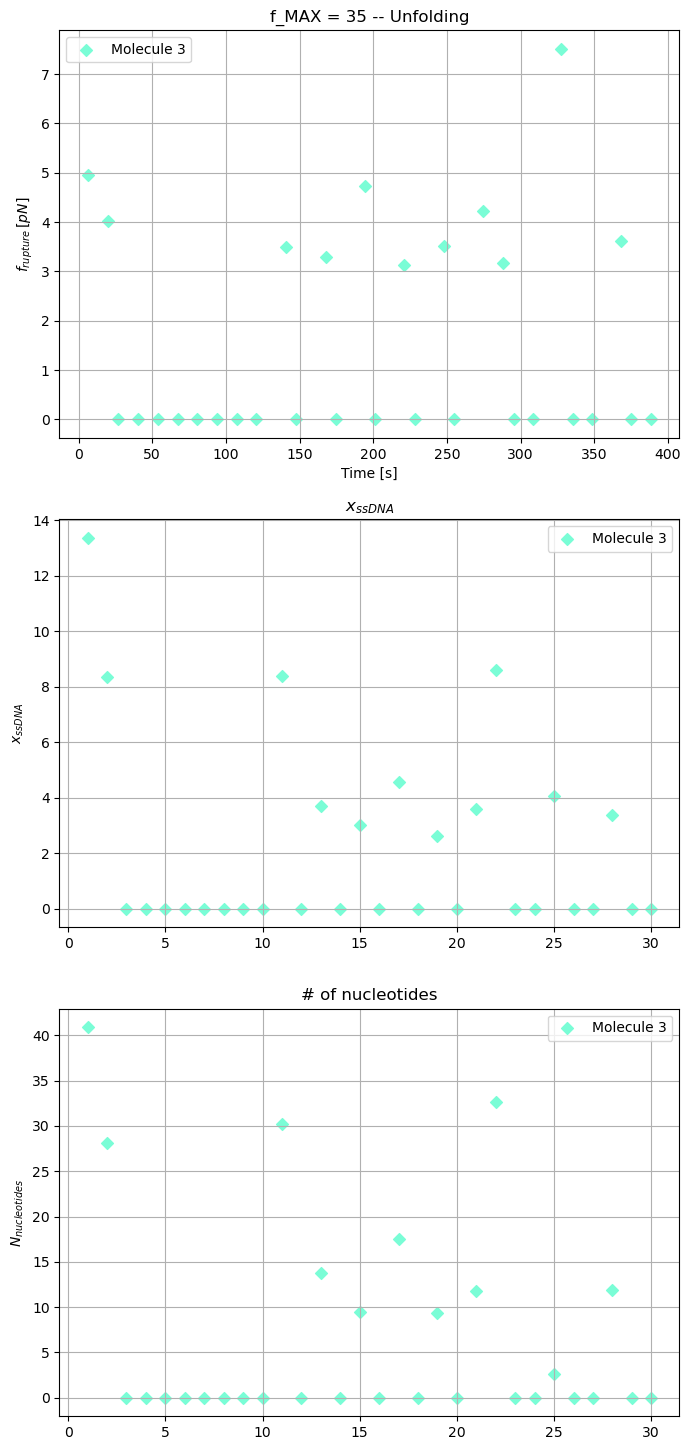

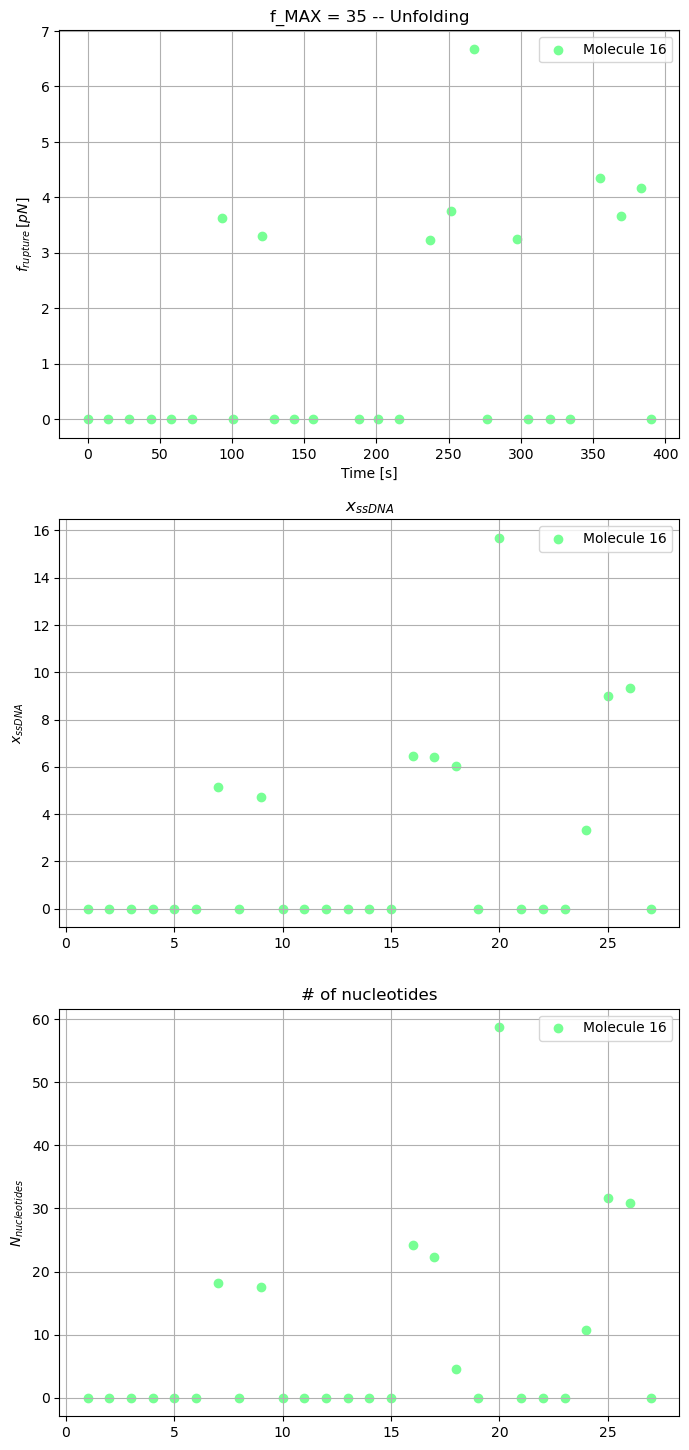

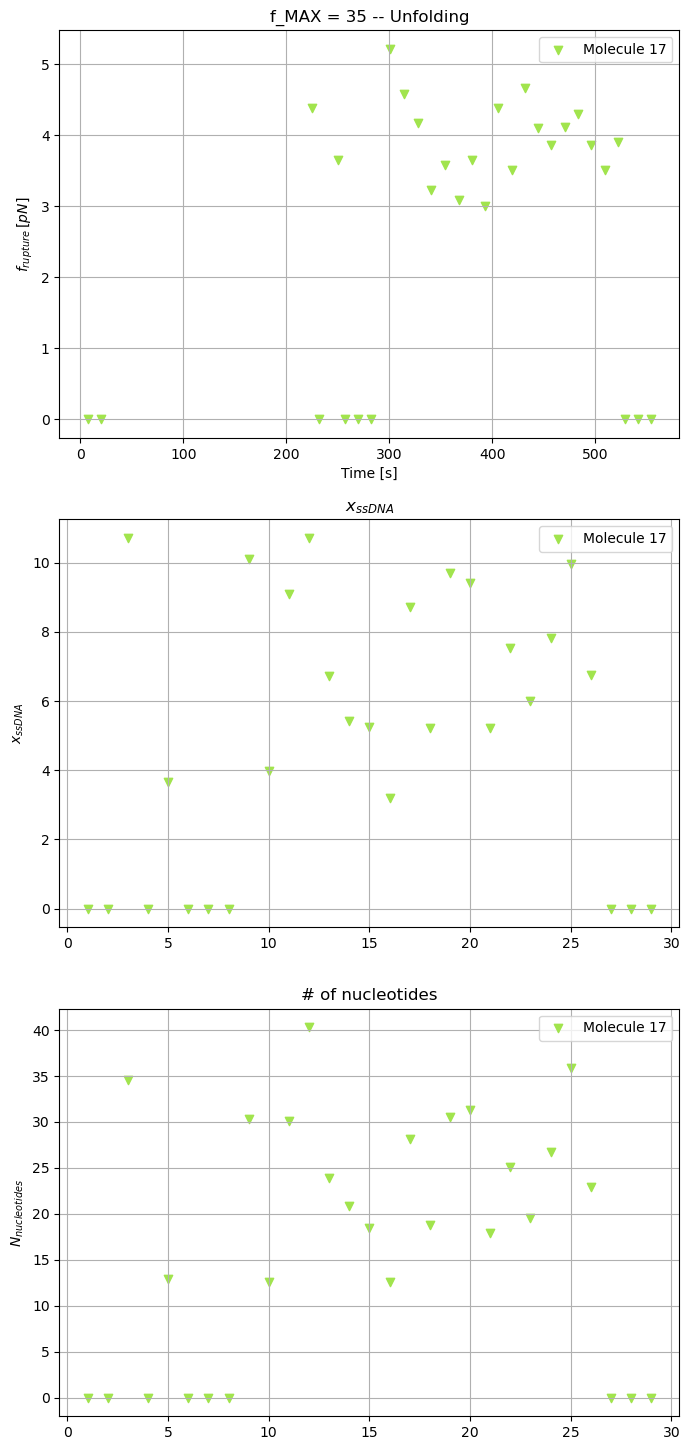

In [20]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_f[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()

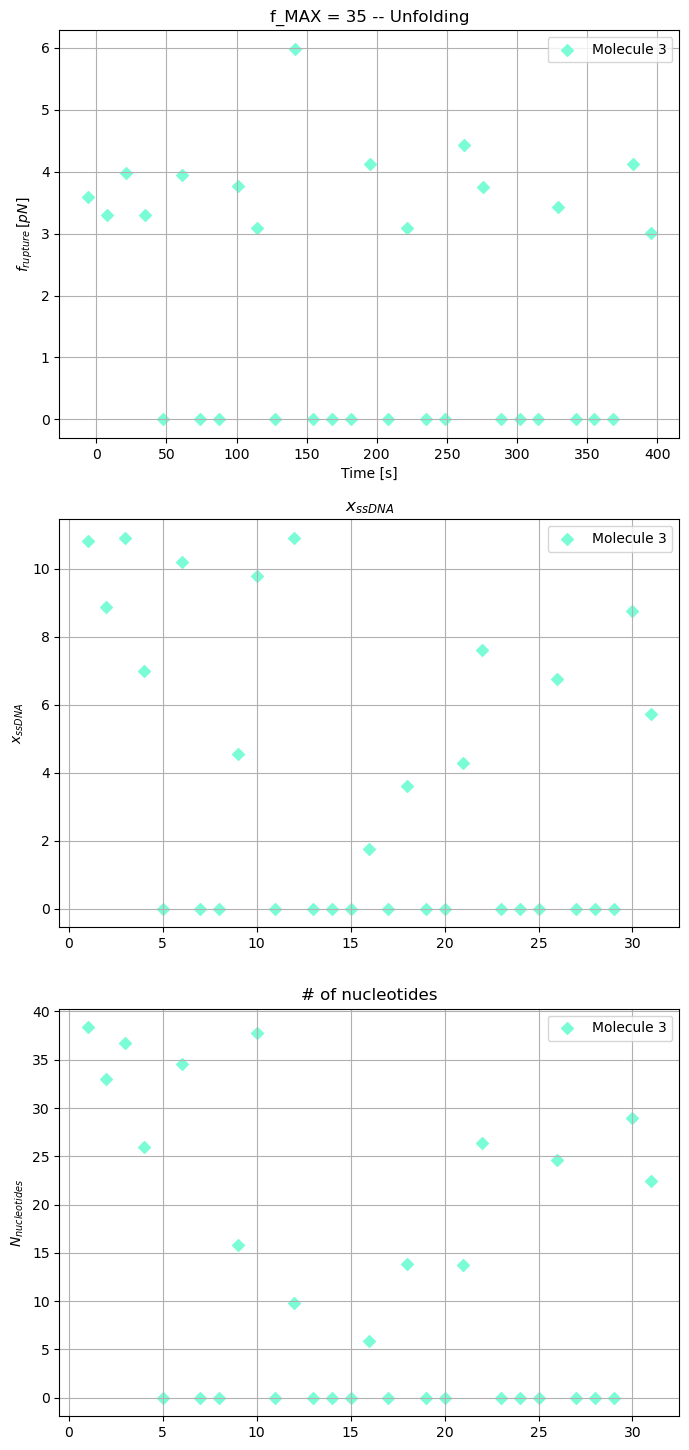

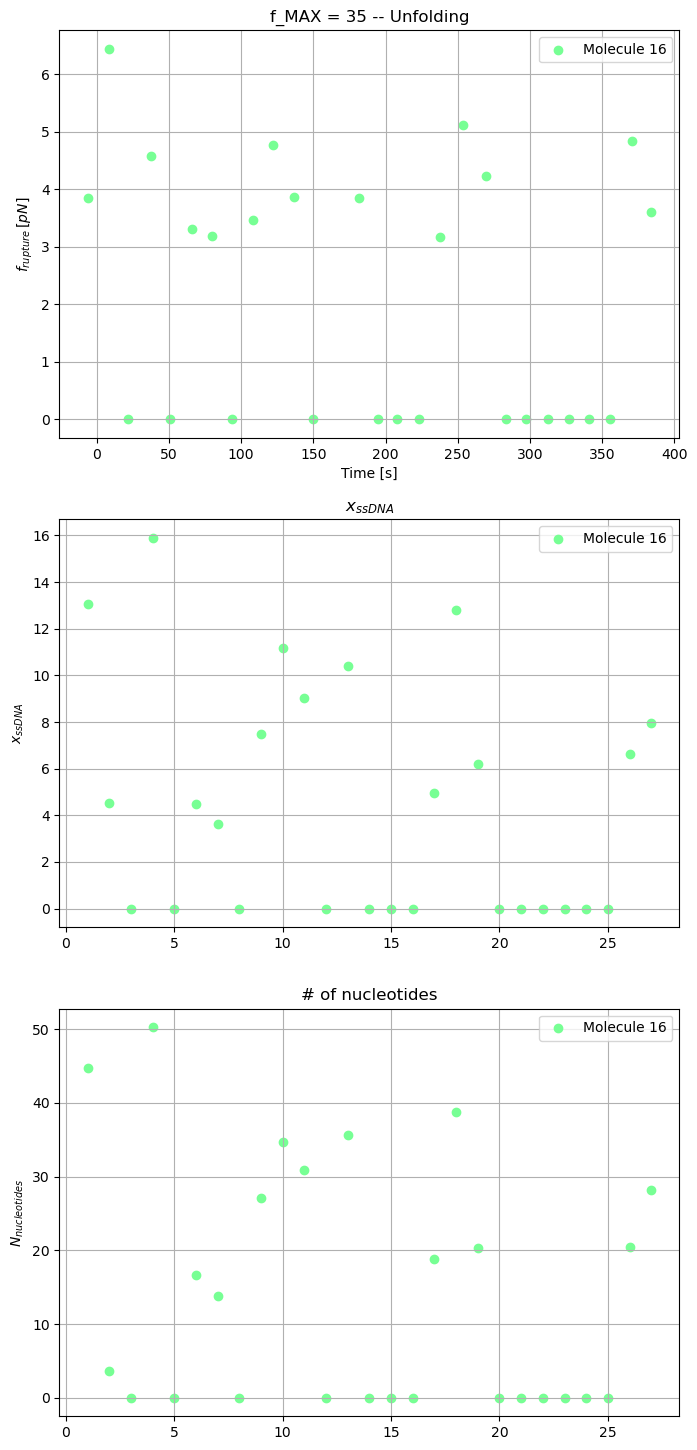

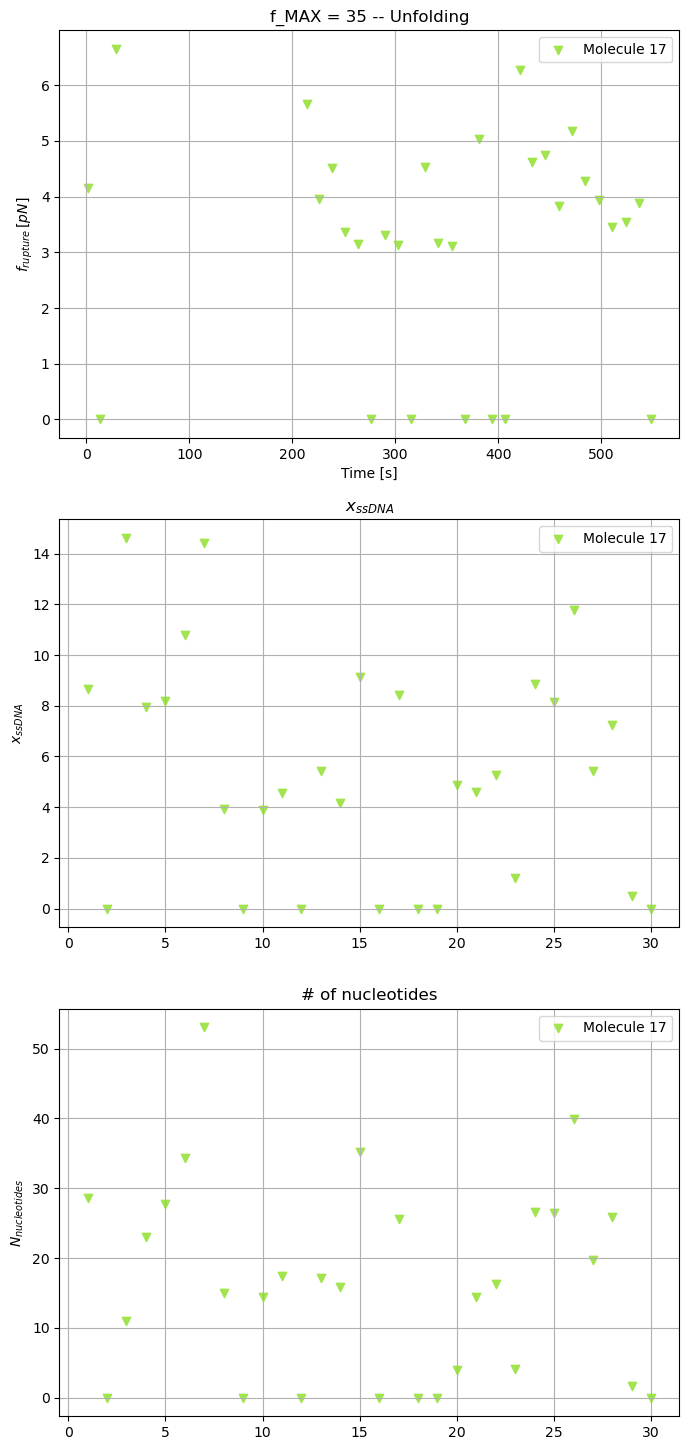

In [21]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_u[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()